# Installing TensorFlow and Keras

Before showing steps of installation, it is important to make note of the computation units on your machine that TensorFlow would use. You have two options to run your TensorFlow code: 

1. You can use the CPU or 
2. You can use the GPU. 

Since GPU's are more suitable to run linear matrix operations faster than the CPUs, data scientists prefer to use them when available. Although training deep learning models on GPUs are way faster than training them on CPUs, accessing GPUs might be costly. The easiest solution for training your models on a GPU is using Google Colaboratory which offers free GPUs. That being said, the TensorFlow codes we'll write will be the same regardless of the underlying computational unit.

Let’s start with the installation of the TensorFlow. In doing so, we make use of the pip package manager of Python. If you'd like to install CPU version of the TensorFlow, then just run this on your terminal:

```bash
pip install tensorflow==2.0.0-rc1
```

However, if you'd like to use GPU version of the TensorFlow, you should run the following:

```bash
pip install tensorflow-gpu==2.0.0-rc1
```

Once you installed TensorFlow, Keras will come bundled to it. So, we don't need to install Keras separately.

# Basics of Keras

Keras offers three different ways of defining and running a deep learning model. These are known as:

* The sequential api,
* The functional api and
* Model subclassing.

Throughout this module, we'll make use of the **sequential api** since it offers the easiest way to define and run a deep learning model. The other two apis enable us to write some more sophisticated deep learning architectures. But, for our purposes the sequential api offers more than enough. We import it in our code as the following:

```python
from tensorflow.keras.models import Sequential 
```

As we'll see shortly, using `Sequential()` class, we'll build our ANN step by step.

# Implementing a basic ANN model

Building a deep learning model using the sequential api of Keras is quite easy. Remember that the deep learning models consist of layers stacked on top of each other. For example, the second layer comes after the first layer, the third layer comes after the second layer etc. Keras mimics this sequential structure of the deep learning model when implementing them programmatically.

When implementing an ANN in Keras, we do followings step by step:

* First, we create a model object.
* Second, we add layers to the model one by one.

After doing these, we'll end up with a deep learning model structure. The next steps are as follows:

* We define an **optimizer** and compile our model.
* After compiling the model, we train our model using training data.
* The last step is to evaluate the performance of our model on a test set.

The figure below sketches the steps to implement a deep learning model in Keras:

![keras](assets/keras.png)

That is all! Let's start by talking about the dataset we'll be using in this checkpoint. Then, we'll implement our model using Keras.

## Dataset

Throughout this module, we'll be using a famous optical character recognition (OCR) dataset called **MNIST**. This dataset comprises of 70000 grayscale images of handwritten digits. Using this dataset in deep learning research and education is classical and that's why we choose it here. In the following, we'll load the dataset and do some data preprocessing. As we'll see shortly, each image is represented as 28x28 pixel data. This is a two-dimensional vector. We'll first convert this to a vector of 784 length which will be single-dimensional. We also normalize each vector by dividing each element by 255 (this is the maximum value of the RGB color scale). 

We load the MNIST dataset using Keras' `datasets` module. We use `mnist` class from this module to load the MNIST data. In order to do that, we need to import it as follows:

**Note**: You don't have to use this method to download the MNIST dataset. It's available online [here](http://yann.lecun.com/exdb/mnist/). You can also download the dataset from that link and then load it your own way. Notice that the dataset in the link is separated into two (as training and test sets).

In [1]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

Then, we load the data and do our preprocessing:

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Next we one hot code our target variable using `to_categorical` function of Keras' `utils` module:

In [4]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Now, let's check the size of the data:

In [5]:
X_train[0].shape

(784,)

As you see, the size of each image is 784. In fact, all images in MNIST are 28 by 28 pixels and 784 is just the result of the multiplication of 28 by 28. So, the data we have is a flattened version of the images where each row in the 28x28 matrix is concatenated side by side. 

Let's plot some images and see what they look like:

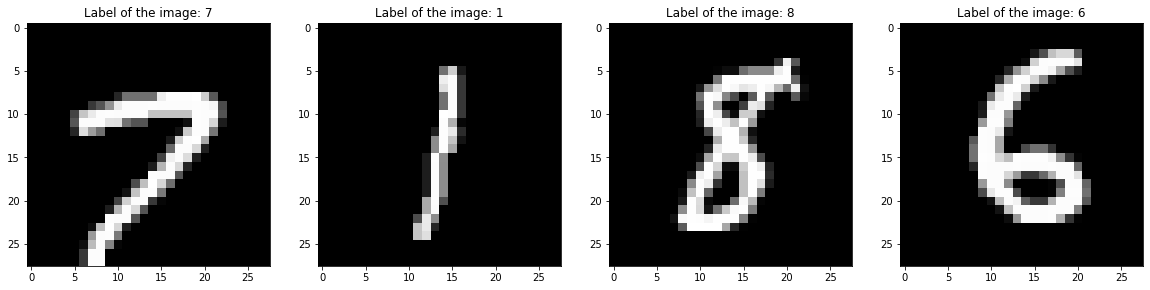

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

We're now ready to jump into building our ANN model.

## Defining the model

As we said before, we'll build our model using `Sequential` class of Keras' `models` module. Once we create our model as:
```python
model = Sequential()
```
We'll start to add layers to our model object one by one (that is, sequentially). The layer type we'll use is called the **dense** layer which we'll import from the `layers` module of the Keras.

In [7]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

Note that, we set the neuron size of the output layer to 10. This is because in MNIST there are 10 classes. We also set the activation function of the output layer to **softmax**. We'll discuss why we use softmax as the activation function in the output layer. For now, we say that when we give an image as input to the model, our model will produce 10 probabilities for each of the 10 classes in the MNIST data. The largest probability class will be the prediction of the model.

We can have a look at the structure of our ANN model using the `summary()` method of our model object:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


As you see, we have three dense layers of which the last one is the output layer. In total, we have 1,875,082 parameters to be estimated in our model.

## Compiling the model

Now we can compile our model. When compiling the model, we define three things:

1. The optimizer that will be used in the training. If you don't know about the optimizers in deep learning, do not worry. We just use it in this checkpoint. But, we'll talk about them in the following checkpoints.
2. The loss function. It's necessary to specify a loss function for a model. Training algorithms use this loss function and try to minimize it during the training. This is also something we'll cover in the next checkpoint.
3. The metric to measure the training performance of our model. In this example, we use the accuracy metric, since our task is a classification task and our dataset is a balanced one.

In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


## Training the model

We're now ready to train our model. Training a model in Keras is done by calling the `fit()` method of the model object. In the following, we train our model:

* Using 128 as the **batch size**. This is something we'll discuss in a later checkpoint.
* Using 20 as the number of epochs. In deep learning jargon, **epoch** means full use of all of the examples in the training data during the training the model. So, we'll train our model during 20 epochs, that's we'll use all of the observations in our training data 20 times when training our model. 

In [15]:
tf.device('/gpu:0')

In [10]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [12]:




# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)


Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [13]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 60000 samples
Epoch 1/20
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/r

Wow! Our model achieved almost 97% accuracy in the training set.

## Evaluating the model

The last step is to evaluate our model using the test set we set apart before. For this purpose, we use the `evaluate()` method of the model object.

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_28967 in device /job:localhost/replica:0/task:0/device:GPU:0
Test score: 0.1460114077553153
Test accuracy: 0.957


The test set accuracy of our model is almost 97%. Good job. Now it's your turn!